# Project: Approximating Areas

![](title_pict/approximating_areas2.png)


In this project, we will explore how to find the area under a curve using Riemann sums.

This method is essential when the area under the curve does not correspond to a simple geometric shape such as a triangle, rectangle, or trapezoid. 

For example, consider the graph of  $f(x)=x^2$ between $x=0$ and $x=1$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## The Region and Function
The following is the graph representing this area.

In [2]:
def f(x):
    return x**2

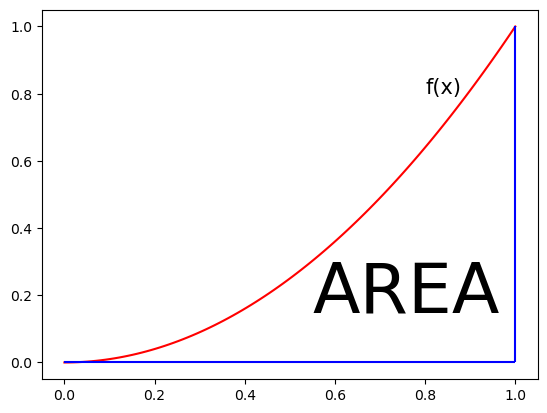

In [3]:
x = np.linspace(0, 1, 100)
y = [f(i) for i in x]
plt.plot(x,y,c='r')
plt.hlines(0, 0, 1, color='b')
plt.vlines(1, 0, 1, color='b')
plt.text(0.8, 0.8, 'f(x)', fontsize=15)
plt.text(0.55, 0.15, 'AREA', fontsize=50);

- The scatter plot below is used to display points within the area under the curve.

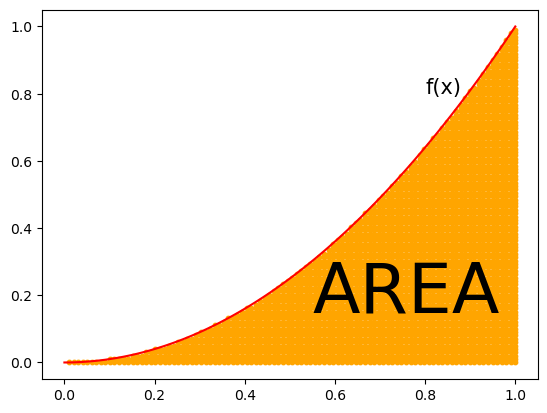

In [4]:
plt.plot(x,y,c='r')
for i in x:
    for j in x:
        if i**2 > j:
            plt.scatter(i, j, c='orange', s=10)
plt.text(0.8, 0.8, 'f(x)', fontsize=15)
plt.text(0.55, 0.15, 'AREA', fontsize=50);

## Subintervals

The area under the curve is approximated using rectangles.

- As the number of rectangles ($n$) increases, the total area becomes closer to the actual area under the curve.

- For each $n$, the width of the rectangles ($\Delta x$) is fixed.

- The rectangles become narrower.

- If the area under the curve is between $x=a$ and $x=b$, then this line segment is divided into $n$ equal subintervals.

- The length of each subinterval is $\displaystyle \Delta x = \frac{b-a}{n}$, and these subintervals represent the widths of - the rectangles.

We can denote boundaries of subintervals by 
- $x_0=a$
- $x_1=a+\Delta x$
- $x_2=a+2\Delta x$
- $x_3=a+3\Delta x$
- ...
- $x_{n-1}=a+(n-1)\Delta x$
- $x_{n}=a+n\Delta x=b$ 

The subintervals are: 
- $[x_0,x_1] = [a,a+\Delta x]$
- $[x_1,x_2] = [a+\Delta x,a+2\Delta x]$
- $[x_2,x_3] =[a+2\Delta x,a+3\Delta x]$
-  ...
- $[x_{n-1},x_n] = [a+(n-1)\Delta x,a+n\Delta x]$ 

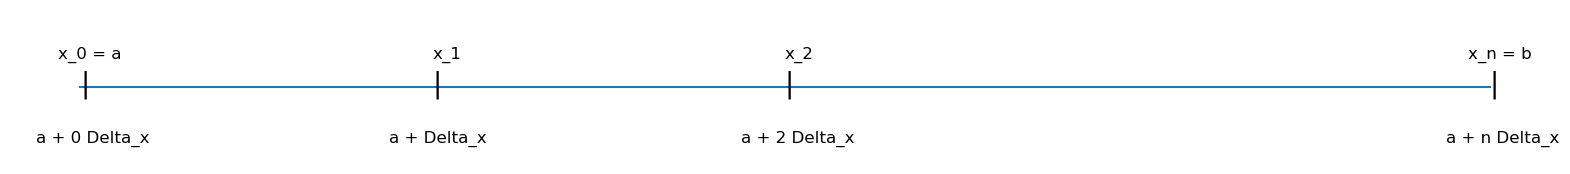

In [5]:
plt.figure(figsize=[20,2])
plt.plot([0,1], [0,0])
plt.xticks([0,1], ['a', 'b'])

plt.text(0, -0.004, '|', fontsize=20)
plt.text( 0-1/64, 0.02, 'x_0 = a', fontsize=12)
plt.text( -1/32, -0.04, 'a + 0 Delta_x', fontsize=12)

plt.text(1/4, -0.004, '|', fontsize=20)
plt.text( 1/4, 0.02, 'x_1', fontsize=12)
plt.text( 1/4-1/32, -0.04, 'a + Delta_x', fontsize=12)

plt.text(1/2, -0.004, '|', fontsize=20)
plt.text( 1/2, 0.02, 'x_2', fontsize=12)
plt.text( 1/2-1/32, -0.04, 'a + 2 Delta_x', fontsize=12)

plt.text(1, -0.004, '|', fontsize=20)
plt.text( 1-1/64, 0.02, 'x_n = b', fontsize=12)
plt.text(1-1/32, -0.04, 'a + n Delta_x', fontsize=12)

plt.axis('off');

In [6]:
# calculate delta_x
def delta_x(a, b, n):
    return (b-a)/n

- If we split the interval $[0,1]$ into four equal parts the length of each subinterval is $\displaystyle \Delta x = \frac{b-a}{n} = \frac{1-0}{4} =0.25$ 

In [7]:
delta_x(0, 1, 4)

0.25

## The left and right end points

There are two different methods of approximation: using the left endpoints and using the right endpoints of each subinterval.

When using the left endpoints, the height of the rectangle corresponding to a subinterval is determined by plugging the left endpoint into the function.

For example, if left endpoints are used to construct the rectangles:
- For the $[x_0, x_1]$ subinterval, the height of the rectangle is $f(x_0)$.
- For the $[x_1, x_2]$ subinterval, the height of the rectangle is $f(x_1)$.

Similarly, if the right endpoints are used to construct the rectangles:
- For the $[x_0, x_1]$ subinterval, the height of the rectangle is $f(x_1)$.
- For the $[x_1, x_2]$ subinterval, the height of the rectangle is $f(x_2)$.

In [8]:
# the left end points 
def left_x(a, b, n):
    delta = delta_x(a, b, n)
    return [i*delta for i in range(n)]

- The following are the left endpoints if we split the interval $[0,1]$ into four equal parts.
- The length of each subinterval is $\displaystyle \Delta x = \frac{b-a}{n} = \frac{1-0}{4} =0.25$ 

In [9]:
left_x(0, 1, 4)

[0.0, 0.25, 0.5, 0.75]

In [10]:
# the right end points 
def right_x(a, b, n):
    delta = delta_x(a, b, n)
    return [i*delta for i in range(1,n+1)]

- The following are the right endpoints if we split the interval $[0,1]$ into four equal parts.

In [11]:
right_x(0, 1, 4)

[0.25, 0.5, 0.75, 1.0]

- Combine the left_x and right_x functions into a single function using a type parameter.

In [12]:
def x_values(a, b, n, type='left'):
    delta = delta_x(a, b, n)
    if type == 'left':
        return [i*delta for i in range(n)]
    else:
        return [i*delta for i in range(1,n+1)]

In [13]:
# left end points
x_values(0, 1, 4, type='left')

[0.0, 0.25, 0.5, 0.75]

In [14]:
# right end points
x_values(0, 1, 4, type='right')

[0.25, 0.5, 0.75, 1.0]

- The following function returns the heights of the rectangles for each subinterval, depending on whether the left or right endpoints are used.

In [15]:
def y_values(func, a, b, n, type='left'):
    x = x_values(a, b, n, type=type)
    return [func(i) for i in x]

- The following are the heights of the rectangles for left endpoints if we split the interval $[0,1]$ into four equal parts.

In [16]:
y_values(f, 0, 1, 4, 'left')

[0.0, 0.0625, 0.25, 0.5625]

- The following are the heights of the rectangles for right endpoints if we split the interval $[0,1]$ into four equal parts.

In [17]:
y_values(f, 0, 1, 4, 'right')

[0.0625, 0.25, 0.5625, 1.0]

## Rectangles

The following function takes five parameters and plots the corresponding rectangle:
- The x-coordinate of the left lower corner of the rectangle.
- The y-coordinate of the left lower corner of the rectangle.
- The width of the rectangle (it can be negative).
- The height of the rectangle (it can be negative).
- The color of the rectangle.

In [18]:
def rect(x_ll, y_ll, width, length, c='b'):
    plt.plot([x_ll, x_ll+width, x_ll+width, x_ll, x_ll], [y_ll, y_ll, y_ll+length, y_ll+length, y_ll], c=c)

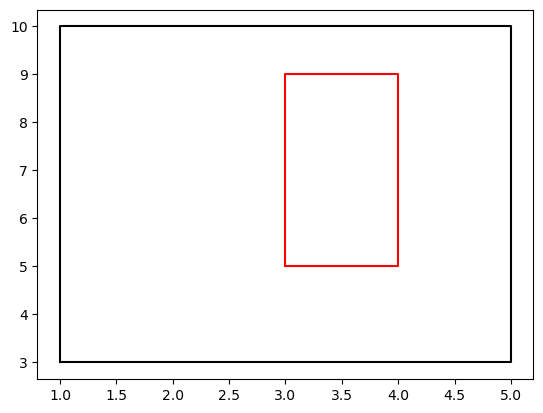

In [19]:
rect(1,3,4,7,c='k') # left lower corner: (1,3) color: black
rect(3,5,1,4,c='r') # left lower corner: (3,5) color: red

- The following function plots the rectangle using either the left or right endpoints.

In [20]:
def plot_rect(func, a, b, n, type='left'):
    
    _x = np.linspace(a, b, 100)
    _y = [func(i) for i in _x]
    plt.plot(_x, _y, c='r')
    
    delta = delta_x(a, b, n)
    x = x_values(a, b, n, type=type)
    y = y_values(func, a, b, n, type=type)
    
    if type == 'left':
        plt.title('Left End Points')
        for i in range(n):
            rect(x[i], 0, delta, y[i], c='g')
    else:
        plt.title('Right End Points')
        for i in range(n):
            rect(x[i]-delta, 0, delta, y[i], c='b')
        

- The following rectangles are obtained using the left endpoints for the interval $[0,1]$ and 4 subintervals.

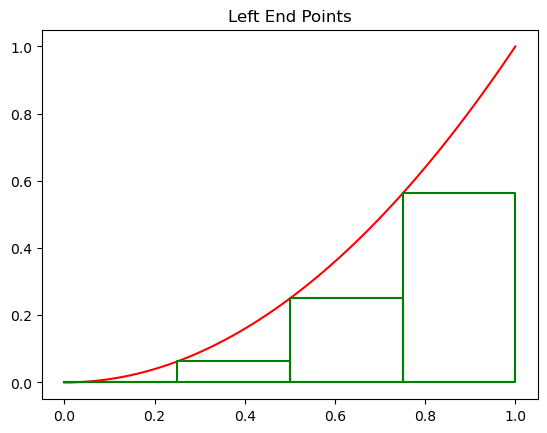

In [21]:
plot_rect(f, 0, 1, 4, type='left')

- The following rectangles are obtained using the left endpoints for the interval $[0,1]$ and 8 subintervals.

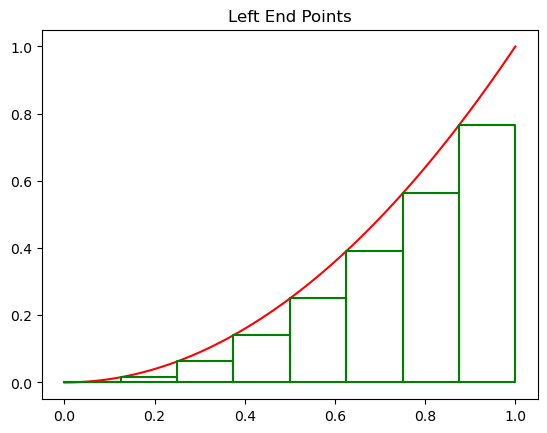

In [22]:
plot_rect(f, 0, 1, 8, type='left')

- The following rectangles are obtained using the left endpoints for the interval $[0,1]$ and 32 subintervals.

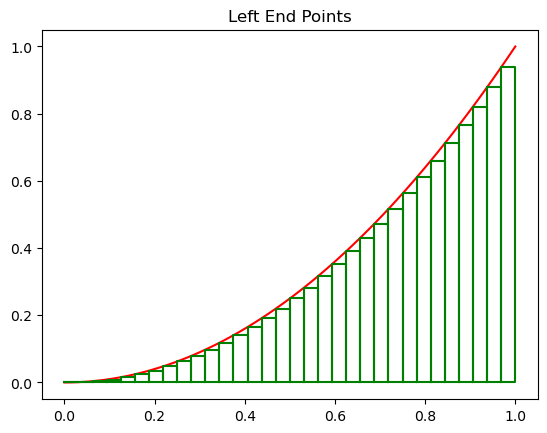

In [23]:
plot_rect(f, 0, 1, 32, type='left')

- The following rectangles are obtained using the right endpoints for the interval $[0,1]$ and 4 subintervals.

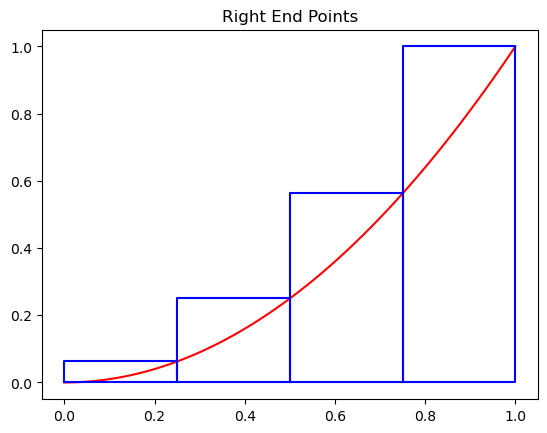

In [24]:
plot_rect(f, 0, 1, 4, type='right')

- The following rectangles are obtained using the right endpoints for the interval $[0,1]$ and 8 subintervals.

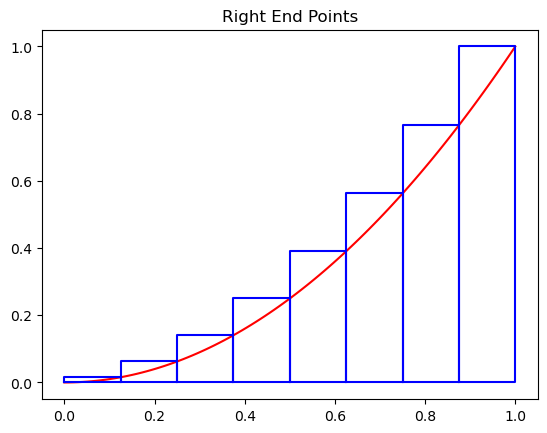

In [25]:
plot_rect(f, 0, 1, 8, type='right')

- The following rectangles are obtained using the right endpoints for the interval $[0,1]$ and 32 subintervals.

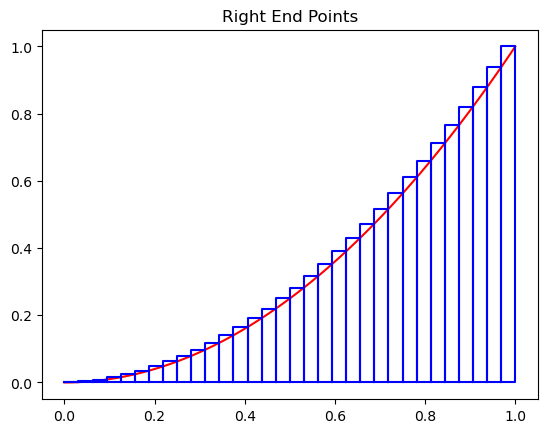

In [26]:
plot_rect(f, 0, 1, 32, type='right')

## The Riemann Sum
The Riemann sum is the sum of the areas of the rectangles.

As the number of rectangles $n$ increases, the Riemann sum becomes closer to the area under the curve.

The choice between using left or right endpoints does not affect this approximation.

- The following function returns the Riemann sum using either the left or right endpoints.

In [27]:
def riemann_sum(func, a, b, n, type='left'):
    delta = delta_x(a, b, n)
    y = y_values(func, a, b, n, type=type)
    return sum(y)*delta

- The following is the sum of the areas of the following 4 rectangles using the right end points.

Riemann Sum: 0.46875


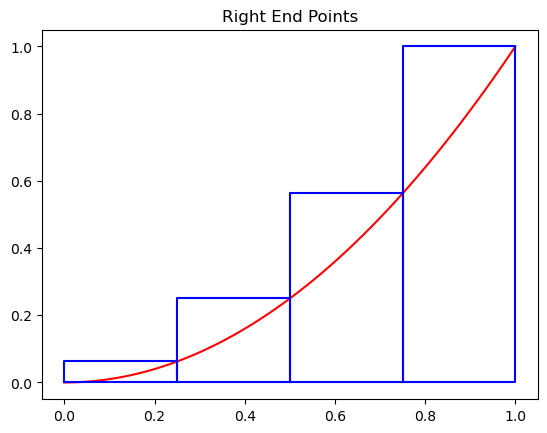

In [28]:
print(f"Riemann Sum: {riemann_sum(f, 0, 1, 4, type='right') }")
plot_rect(f, 0, 1, 4, type='right')

- The following is the sum of the areas of the following 32 rectangles using the right end points.

Riemann Sum: 0.34912109375


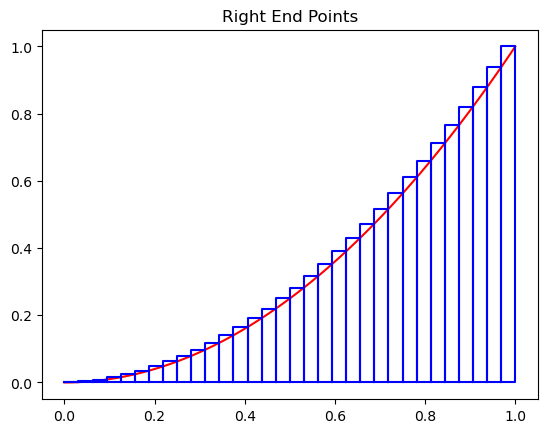

In [29]:
print(f"Riemann Sum: {riemann_sum(f, 0, 1, 32, type='right') }")
plot_rect(f, 0, 1, 32, type='right')

- The following is the sum of the areas of the following 4 rectangles using the left end points.
- The height of the first rectangle is 0, so it appears as a horizontal line.

Riemann Sum: 0.21875


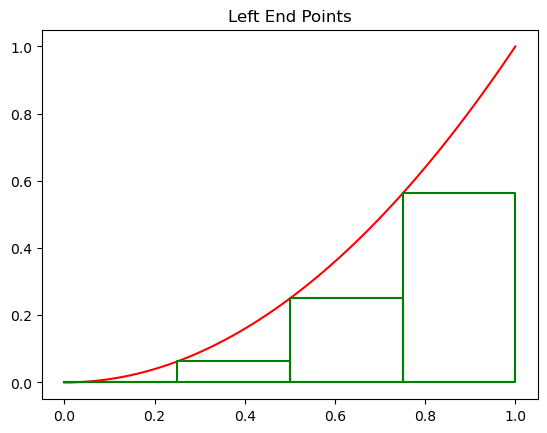

In [30]:
print(f"Riemann Sum: {riemann_sum(f, 0, 1, 4, type='left') }")
plot_rect(f, 0, 1, 4, type='left')

## Area

As $n$ increases, the Riemann sum gets closer to the area under the curve.

In the following code, the Riemann sum is calculated using left and right endpoints for $n=1,2,3,...,50$

As observed, the Riemann sums approach to $1/3$.

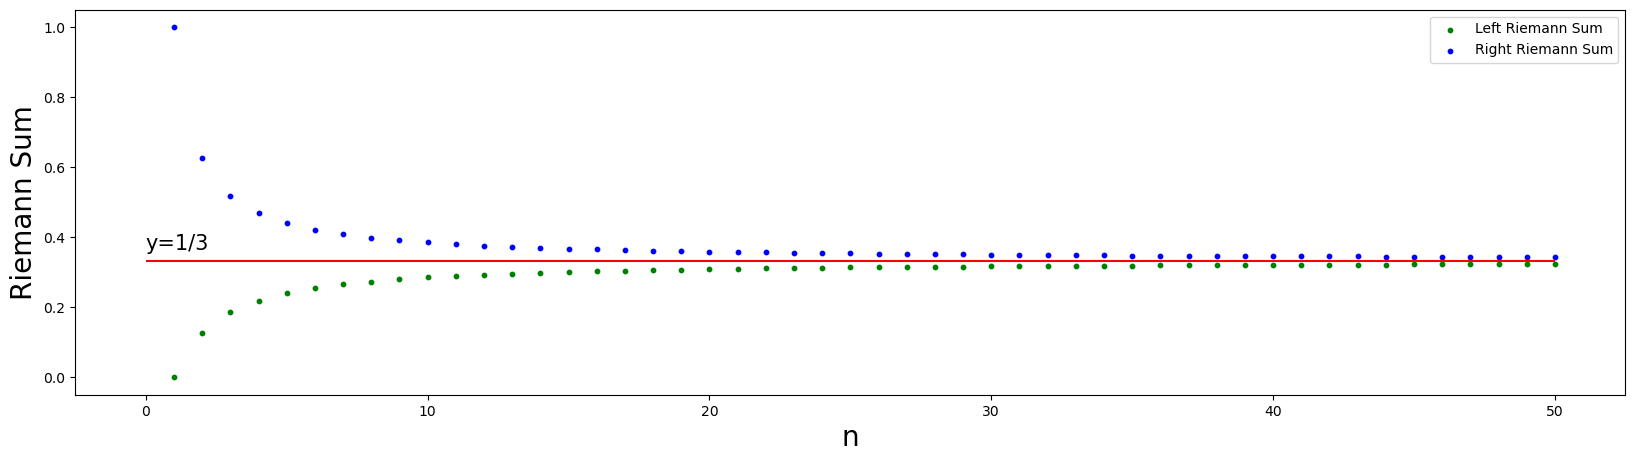

In [31]:
plt.figure(figsize=(20,5))
left_riemann_sum, right_riemann_sum = [], []
for n in range(1,51):
    left_riemann_sum.append(riemann_sum(f, 0, 1, n, type='left'))
    right_riemann_sum.append(riemann_sum(f, 0, 1, n, type='right'))
    
    
plt.scatter(range(1,51), left_riemann_sum, c='g', s=10, label='Left Riemann Sum')
plt.scatter(range(1,51), right_riemann_sum, c='b', s=10, label='Right Riemann Sum')

plt.hlines(1/3, 0, 50, color='r')
plt.text(0, 1/3+0.03, 'y=1/3', fontsize=15)
plt.xlabel('n', fontsize=20)
plt.ylabel('Riemann Sum', fontsize=20)
plt.legend();

## Future Work
The approximation of areas can also be done using the midpoints of subintervals in addition to left and right endpoints. 

Perform the approximation using midpoints by following all the steps that have been done for left/right endpoints.